In [1]:
import plotly as plt
import pandas as pd
import numpy as np
import plotly.express as px
import os
from scipy import stats


In [2]:

def get_baseline(dataline,startpoint,stimulationframeinterval,baselineframe):
    start = startpoint - baselineframe
    end = startpoint + stimulationframeinterval
    baseline = np.average(dataline[start:end])
    return(baseline)


def normalization(dataline,baseline):
    data = (dataline-baseline)/baseline
    return (data)

def inputalign(dataline,startpoint,stimulationframeinterval,baselineframe):
    baseline = get_baseline(dataline=dataline,startpoint=startpoint,stimulationframeinterval=stimulationframeinterval,baselineframe=baselineframe)
    normalizedData = normalization(dataline=dataline,baseline=baseline)
    newdata = normalizedData[(int(startpoint)-int(baselineframe)):startpoint+201]
    newdata.reset_index(drop = True)
    fig = px.line(newdata)
    fig.update_layout(template= 'simple_white')
    fig.show()
    return(newdata)

def collectdata(path):

    data_list = []
    data_name = []
    data_info = []
    data_stack = np.array(data_list)
    for root,dirs,files in os.walk(path):
        for file in files:
            # print(file)
            if os.path.splitext(file)[-1]=='.csv':
                if not file == 'info.csv':
                    datapath = root+'\\'+file
                    # print(int(file[0:2]))
                    data_name.append(file)
                    # print(file)
                    data_list.append(pd.read_csv(datapath,header=1,usecols=[0],nrows=600))
                    data_stack = np.stack(pd.read_csv(datapath,header=1,usecols=[0],nrows=600))
                else :
                    data_info.append(pd.read_csv(root+'\\'+'info.csv'))
    #             # try:
    #             #     baseline = get_baseline(data,startpoint= startpoint,stimulationframeinterval= 10)
    #             #     datapre = normalization(data,baseline= baseline)
    #             # except:
    #             #     print('normalization error'+ os.path.join(numbers,csv))
    #             #     continue

    df_info = pd.DataFrame(np.reshape(np.array(data_info),(17,3)))
    df_info.columns = ['samples','treatment','treatmentframe']
    
# print(d1infon[:,0:1])
    #             data_list.append(data)
    # dataframe = np.array(data_list)


    return data_name,data_list,df_info,data_stack




In [3]:
data1= pd.read_csv('20.cell1.csv')
px.line(data1['Average'])

FileNotFoundError: [Errno 2] No such file or directory: '20.cell1.csv'

In [319]:
dataline = data1['Average']
startpoint = 100
stimulationframeinterval = 10
baselineframe = 50
baseline = get_baseline(dataline=dataline,startpoint=startpoint,stimulationframeinterval=stimulationframeinterval,baselineframe=baselineframe)
normalizedData = normalization(dataline=dataline,baseline=baseline)
newdata = normalizedData[(int(startpoint)-int(baselineframe)):startpoint+300]
newdata = newdata.reset_index(drop = True)
fig = px.line(newdata)
fig.update_layout(template= 'simple_white')
fig.show()

In [320]:
np.save('data20-1',newdata.tolist())

In [250]:
l1 = np.load('data1-1.npy')
l2 = np.load('data1-2.npy')
l3 = np.load('data1-3.npy')
l4 = np.load('data7-1.npy')
l5 = np.load('data10-1.npy')
l6 = np.load('data10-2.npy')
l7 = np.load('data11.npy')
l8 = np.load('data13.npy')
l9 = np.load('data18-1.npy')
l10 = np.load('data18-2.npy')
l11 = np.load('data19-1.npy')
l12 = np.load('data19-2.npy')

In [206]:
df1 = pd.DataFrame({'cells':['1-1','1-2','1-3','7-1','10-1','10-2','11-1','13-1','18-1','18-2','19-1','19-2'],
'datatraces':[l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12]
})

df1

,cells,datatraces
0,1-1,"[0.029501774653727053, 0.02796233100202143, 0...."
1,1-2,"[0.003775627131530469, 0.0035034444715619155, ..."
2,1-3,"[0.012207666524275709, 0.014628468689238873, 0..."
3,7-1,"[-0.029522483588207523, -0.0349863518046022, -..."
4,10-1,"[0.00828920046966902, 0.007126991879433737, 0...."
5,10-2,"[0.009476292789471059, 0.008892053104391229, 0..."
6,11-1,"[0.0036455487208669063, 0.00438813398621114, 0..."
7,13-1,"[7.293852363800645e-05, 0.00036198926592395176..."
8,18-1,"[-0.010777356629665676, -0.010379361613313709,..."
9,18-2,"[-0.01464342160450028, -0.012699661915398163, ..."


In [251]:
df2 = np.array([l1,l2,l3,l4,l5,l6,l7,l8,l9,l10,l11,l12])
print(np.shape(df2))

(12, 350)


In [252]:
datanp1 = np.average(df2,axis=0)

In [275]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly


x = np.arange(len(l1))

# for i in range(len(df2)):
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=x ,y=l1,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l2,mode='lines'))
# fig1.add_trace(go.Scatter(x=x ,y=l3,mode='lines'))
# fig1.add_trace(go.Scatter(x=x ,y=l4,mode='lines'))
# fig1.add_trace(go.Scatter(x=x ,y=l5,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l6,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l7,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l8,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l9,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l10,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l11,mode='lines'))
fig1.add_trace(go.Scatter(x=x ,y=l12,mode='lines'))
fig1.update_layout(template= 'simple_white')
plotly.offline.plot(fig1, image_filename='ATP', image='svg')




'temp-plot.html'

In [276]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=x ,y=datanp1,mode='lines'))
fig1.update_layout(template= 'simple_white')
plotly.offline.plot(fig1, image_filename='ATP', image='svg')

'temp-plot.html'

In [322]:
c1 = np.load('data2-1.npy')
c2 = np.load('data2-2.npy')
c3 = np.load('data2-3.npy')
c4 = np.load('data2-4.npy')
c5 = np.load('data2-5.npy')
c6 = np.load('data4-1.npy')
c7 = np.load('data4-2.npy')
c8 = np.load('data4-3.npy')
c9 = np.load('data16-1.npy')
c10 = np.load('data16-2.npy')
c11 = np.load('data16-3.npy')
c12 = np.load('data16-4.npy')
c13 = np.load('data17-1.npy')
c14 = np.load('data20-1.npy')

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=x ,y=c1,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c2,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c3,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c4,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c5,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c6,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c7,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c8,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c9,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c10,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c11,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c12,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c13,mode='lines'))
fig2.add_trace(go.Scatter(x=x ,y=c14,mode='lines'))
fig2.update_layout(template= 'simple_white')
plotly.offline.plot(fig2, image_filename='Haemolyph', image='svg')


'temp-plot.html'

In [324]:
df3 = np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14])
fig3 = go.Figure()
fig3.add_trace(go.Scatter(x=x ,y=np.average(df3,axis=0),mode='lines'))
fig3.add_trace(go.Scatter(x=x ,y=np.average(df2,axis=0),mode='lines'))
fig3.update_layout(template= 'simple_white')
plotly.offline.plot(fig3, image_filename='HaemolyphVSATP', image='svg')

'temp-plot.html'

In [325]:
# for i in range(len(df2)):
fig4 = go.Figure()
fig4.add_trace(go.Scatter(x=x ,y=l1,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l2,mode='lines',name='ATP'))
# fig1.add_trace(go.Scatter(x=x ,y=l3,mode='lines',name='ATP'))
# fig1.add_trace(go.Scatter(x=x ,y=l4,mode='lines',name='ATP'))
# fig1.add_trace(go.Scatter(x=x ,y=l5,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l6,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l7,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l8,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l9,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l10,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l11,mode='lines',name='ATP'))
fig4.add_trace(go.Scatter(x=x ,y=l12,mode='lines',name='ATP'))

fig4.add_trace(go.Scatter(x=x ,y=c1,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c2,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c3,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c4,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c5,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c6,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c7,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c8,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c9,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c10,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c11,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c12,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c13,mode='lines',name='Haemolyph'))
fig4.add_trace(go.Scatter(x=x ,y=c14,mode='lines',name='Haemolyph'))

fig4.update_layout(template= 'simple_white')
plotly.offline.plot(fig4, image_filename='individualtraces', image='svg')

'temp-plot.html'

In [327]:
sem1 = stats.sem(df2,axis = 0)
mean1 = np.mean(df2,axis=0)

sem2 = stats.sem(df3,axis = 0)
mean2 = np.mean(df3,axis=0)


df3 = np.array([c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14])
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=x ,y=mean1-sem1,mode='lines',name='ATP'))
fig5.add_trace(go.Scatter(x=x ,y=mean1,mode='lines',name='ATPmean'))
fig5.add_trace(go.Scatter(x=x ,y=mean1+sem1,mode='lines',name='ATP'))

fig5.add_trace(go.Scatter(x=x ,y=mean2-sem2,mode='lines',name='Haemolyph'))
fig5.add_trace(go.Scatter(x=x ,y=mean2,mode='lines',name='Haemolyphmean'))
fig5.add_trace(go.Scatter(x=x ,y=mean2+sem2,mode='lines',name='Haemolyph'))
fig5.update_layout(template= 'simple_white')
plotly.offline.plot(fig5, image_filename='HaemolyphVSATP', image='svg')

'temp-plot.html'

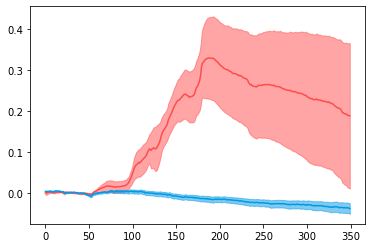

In [329]:

import matplotlib.pyplot as plt

plt.plot(x, mean1,color="#ff4c4c")
plt.fill_between(x,mean1-sem1,mean1+sem1, color="#ff4c4c",alpha=0.5) 
plt.plot(x,mean2,color = '#0099e5')
plt.fill_between(x,mean2-sem2,mean2+sem2, color="#0099e5",alpha=0.5) 
plt.show() 